<p style="text-align: center; font-size: 25px;"> IBI5031 - Aprendizagem de Máquina para Bioinformática<br>
Quarta Lista de Exercı́cios<br>
Docente: Marcelo da Silva Reis<br>
Laboratório de Ciclo Celular, Instituto Butantan<br>
Programa de Pós-Graduação Interunidades em Bioinformática da USP </p>

<hr>

<p style="text-align: center; font-size: 20px;"> Nome: Guilherme Paschoalini <br>
    N USP: 11515572 </p>

<hr>

Questão 1. (5 pontos) Utilize o algoritmo de agrupamento k-médias (k-means), disponı́vel no scikit-learn e que é apresentado em detalhes em:

scikit-learn.org/stable/modules/clustering.html#k-means

para agrupar as caracterı́sticas dos 197 pontos (não agrupe as classes!). Como sabemos que esse conjunto de dados é de classificação binária, inicie escolhendo agrupar os pontos
em duas classes. Compare o resultado obtido aqui com as classes reais e também com o seu resultado da classificação feita por SVM feita na Lista 3 (considere apenas o melhor
resultado de classificação obtido na Lista 3). Monte uma tabela para comparar os erros e acertos das duas metodologias.

<hr>

#### Bibliotecas necessárias para execução da tarefa 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans

### Importação dos dados
#### Os dados serão importados diretamente do link fornecido pela Uci, sendo assim não há necessidade de download local

In [4]:
data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data', sep=',')

#### Após isso podemos verificar as informações contidas por meio de um agrupado de linhas e colunas, apesar do próprio dataframe já nos exibir a quantidade de linhas e colunas podemos utilizar a função shape para confirmar
#### Nossa base de dados possui:
- 195 linhas (pacientes e ou participantes)
- 24 colunas (variáveis coletadas)

In [5]:
feature_df = data.drop(['name', 'status'], axis=1)

# independent variable
X = np.asarray(feature_df)

# dependent variable
data['status'] = data['status'].astype('int')
y = np.asarray(data['status'])

In [6]:
feature_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


<hr>

### Criação dos cluters

#### Para realizar a análise dos clusters criei 4 modelos com uso de k-médias (k-means) para posteriormente comparar com o desempenho do melhor modelo supervisionado
#### Os clusters foram criados da seguinte forma:

- Dados originais com método de inicialização k-means++ (seleciona centros de cluster iniciais de forma inteligente para acelerar a convergência)
- Dados originais com método de inicialização random (escolha observações aleatoriamente a partir dos dados para os centróides iniciais)
- Dados normalizados com método de inicialização k-means++
- Dados normalizados com método de inicialização random

#### Para a normalização dos dados foi utilizada a função MinMaxScaler presente no pacote Sklearn, isto é, redimensionamento dos dados do intervalo original para que todos os valores fiquem dentro do novo intervalo de 0 e 1

#### Cluster 1 - Dados originais com inicialização k-means++

In [79]:
kmeans_k_o = KMeans(n_clusters=2, init = 'k-means++', max_iter = 300)

In [83]:
pred_y = kmeans_k_o.fit_predict(feature_df)

In [84]:
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int32)

In [85]:
labels = np.unique(pred_y)

cm = pd.DataFrame(confusion_matrix(y, pred_y, labels=labels), index=labels, columns=labels)
cm

,0,1
0,45,3
1,138,9


#### Cluster 2 - Dados originais com inicialização random

In [87]:
kmeans_r_o = KMeans(n_clusters=2, init = 'random', max_iter = 300)

In [103]:
pred_y = kmeans_r_o.fit_predict(feature_df)

In [104]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [105]:
labels = np.unique(pred_y)

cm = pd.DataFrame(confusion_matrix(y, pred_y, labels=labels), index=labels, columns=labels)
cm

,0,1
0,32,16
1,34,113


#### Processo de normalização dos dados com o pacote MinMax para teste dos clusters 3 e 4 

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
feature_df2 = scaler.fit_transform(feature_df)

In [10]:
feature_df2

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

#### Cluster 3 - Dados normalizados (MinMax) com inicialização k-means++

In [112]:
kmeans_k_n = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300)

In [122]:
pred_y = kmeans_k_n.fit_predict(feature_df2)

In [123]:
pred_y

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [124]:
labels = np.unique(pred_y)

cm = pd.DataFrame(confusion_matrix(y, pred_y, labels=labels), index=labels, columns=labels)
cm

,0,1
0,48,0
1,72,75


#### Cluster 4 - Dados normalizados (MinMax) com inicialização random

In [126]:
kmeans_r_n = KMeans(n_clusters = 2, init = 'random', max_iter = 300)

In [151]:
pred_y = kmeans_r_n.fit_predict(feature_df2)

In [152]:
pred_y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [153]:
labels = np.unique(pred_y)

cm = pd.DataFrame(confusion_matrix(y, pred_y, labels=labels), index=labels, columns=labels)
cm

,0,1
0,0,48
1,75,72


<hr>

### Tabela comparativa entre as metodologias

|               | Cluster 1     | Cluster 2  | Cluster 3    | Cluster 4 | SVM RBF |
| ------------- | ------------- |-------     |--------------|-----------|-------- |
| Sensibilidade |   0.06        | 0.77       | 0.51         | 0.49      | 1       |
| Especificidade|   0.94        | 0.66       | 1            | 0         | 0.78    |
| Acurácia      |  27.8%        | 74.3%      | 63.1%        | 36.9%     | 92.3%   |

#### Levando em consideração a acurácia, o melhor resultado observado foi o segundo cluster (dados originais com inicialização random) com 74,3%, ainda assim inferior ao melhor modelo observado no aprendizado supervisionado, SVM com uso de kernel RBF, que obteve 92.3% de acurácia

<hr>

Questão 2. (5 pontos) Com os métodos de agrupamento hierárquico disponı́veis no scikit-learn:
    
scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

faça uma aglomeração hierárquica das caracterı́sticas dos 197 pontos. Teste realizar aglomerações com diferentes critérios, e plote dendogramas para visualizar as hierarquias de
seu cluster. Para um ou mais critérios, o procedimento foi capaz de separar (total ou parcialmente) os pontos em dois grupos, cada um correspondendo a uma das duas classes
reais? Em outras palavras, foi possı́vel obter um resultado como o da figura abaixo, com cada uma das subárvores em laranja contendo pontos de apenas uma das duas classes?
(e.g., “com Parkinson” à esquerda e “sem Parkinson” à direita?)

<hr>

### Bibliotecas necessárias para o desenvolvimento

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
plt.rcParams.update({'font.size': 12})

#### Para a utilização dos métodos de agrupamento hierárquico utilei os dados normalizados pela função MinMax do exercício anterior, o comando abaixo somente verifica a variável

In [12]:
feature_df2

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

#### Antes de realizar o agrupamento propriamente dito e os dendogramas realizei uma análise de componentes principais (PCA) a fim de reduzir as dimenções dos dados para apenas duas. A análise de componentes principais (PCA) é o processo de calcular os componentes principais e usá-los para realizar uma mudança de base nos dados. Para essa tarefa utilizei a função PCA presente no pacote do Sklearn, somente o parâmetro número de componentes foi definido como 2, para todo o resto foi utilizado o default do pacote 

In [13]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(feature_df2) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

#### Verificação da transformação dos dados (resultado da PCA)

In [14]:
X_principal

,P1,P2
0,0.383018,-0.271346
1,0.832833,-0.094449
2,0.657950,-0.152101
3,0.727837,-0.157592
4,0.953852,-0.061909
...,...,...
190,0.000792,0.256324
191,-0.133570,0.285582
192,0.014911,0.229756
193,-0.181109,0.273762


#### Visualização dos pontos gerados a partir de um gráfico simples, aqui já é possível ver como alguns pontos se separam e que existe mais de uma classe nos dados

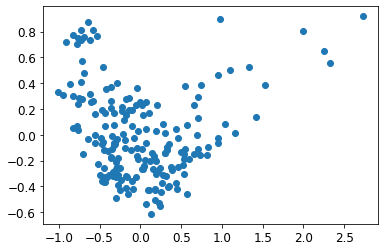

In [19]:
plt.scatter(X_principal['P1'], X_principal['P2'])

<hr>

### Criação dos dendrogramas

#### Para a criação dos dendrogramas com diferentes critérios optei por alterar o método utilizado para o calculo das distâncias, foi testado:

- Ward (Ward variance minimization algorithm)
- Complete (Farthest Point Algorithm)
- Average (UPGMA algorithm)
- Single (Nearest Point Algorithm)

#### Para todos os modelos a variável que continha a classe foi removida, bem como o número de agrupamentos do cluster desejado não foi expecificado, ficou a cargo do algoritmo definir quantas classes existem nos dados

<hr>

#### Dendograma com método Ward

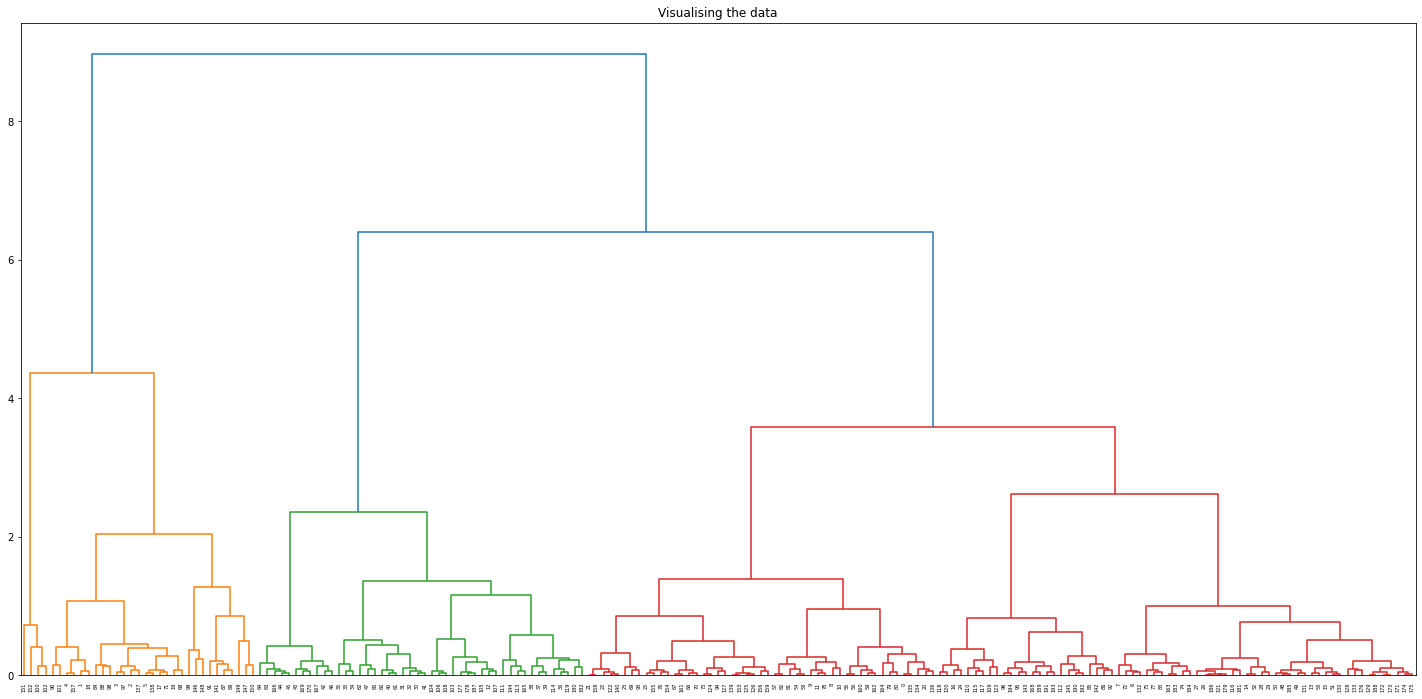

In [163]:
plt.figure(figsize =(25, 12)) 
plt.title('Visualising the data') 
ward = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

#### Dendograma com método Complete

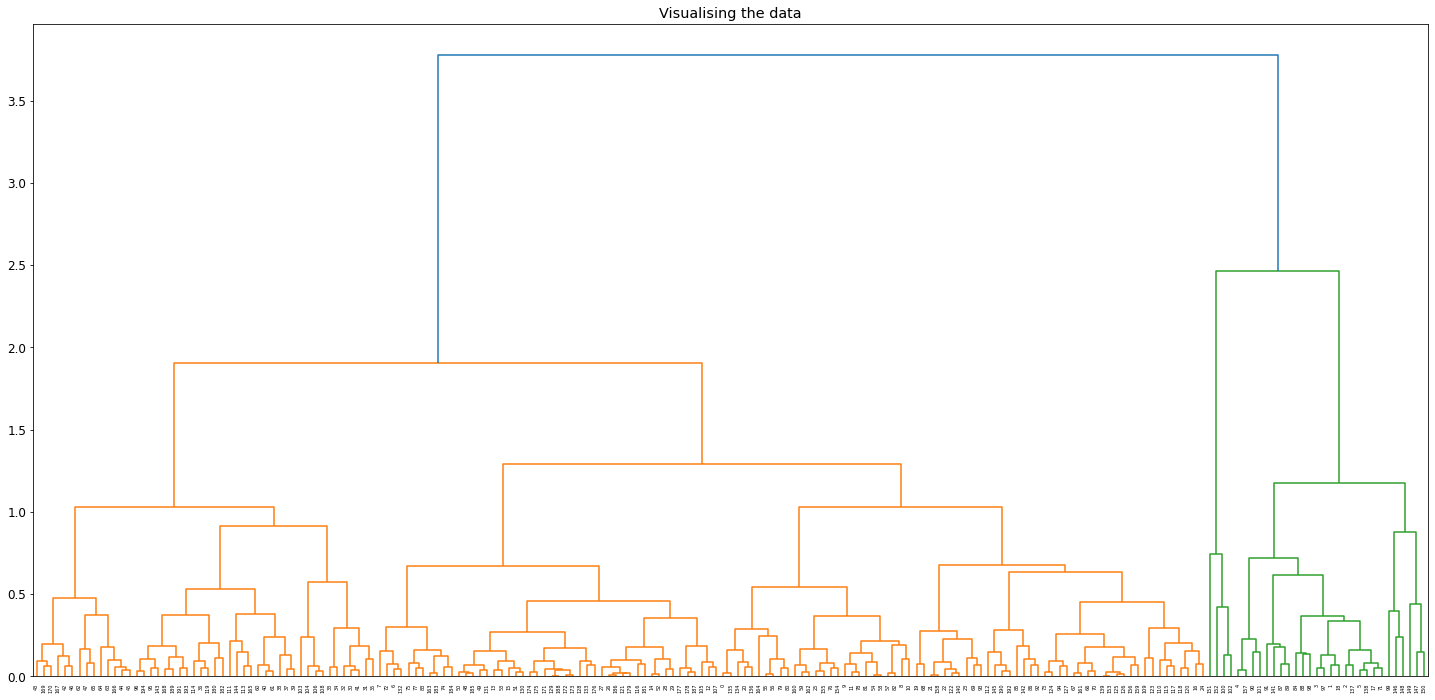

In [178]:
plt.figure(figsize =(25, 12))
plt.title('Visualising the data') 
ward = shc.dendrogram((shc.linkage(X_principal, method ='complete')))

#### Dendograma com método Average

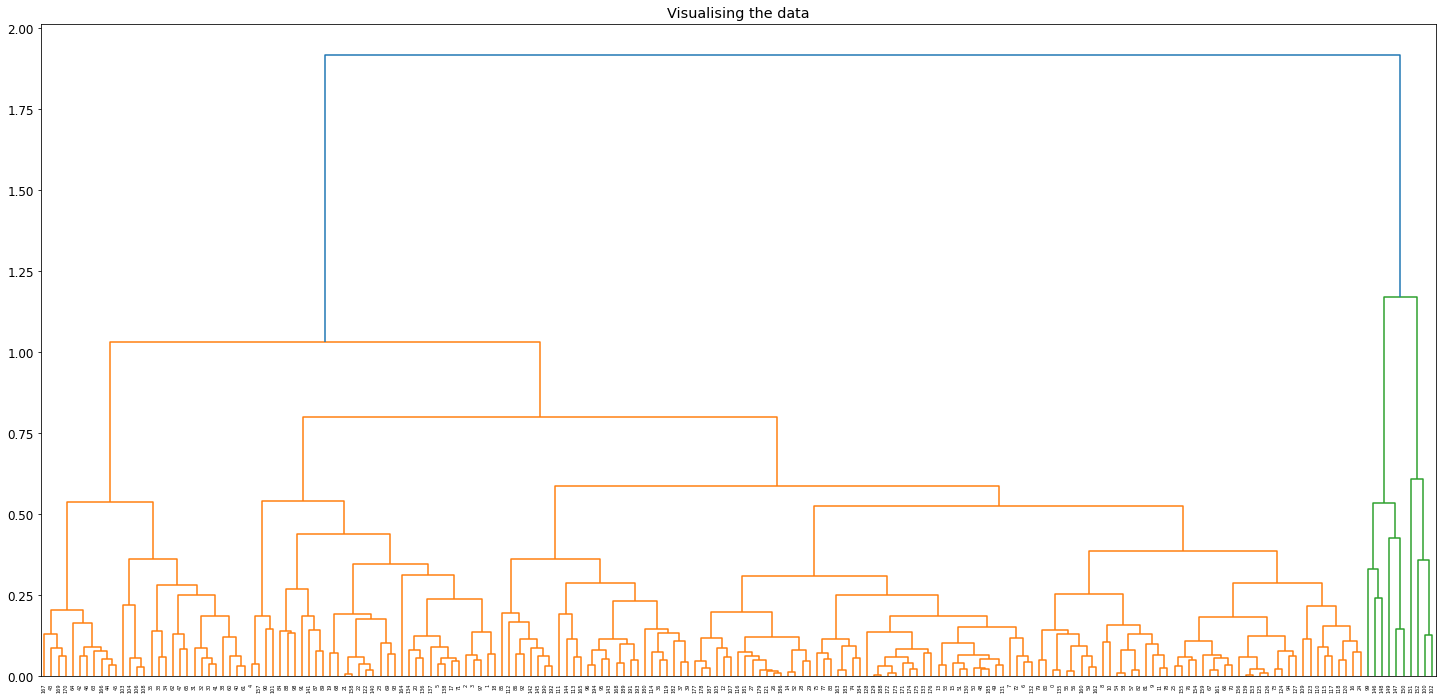

In [180]:
plt.figure(figsize =(25, 12))
plt.title('Visualising the data') 
ward = shc.dendrogram((shc.linkage(X_principal, method ='average')))

#### Dendograma com método Single

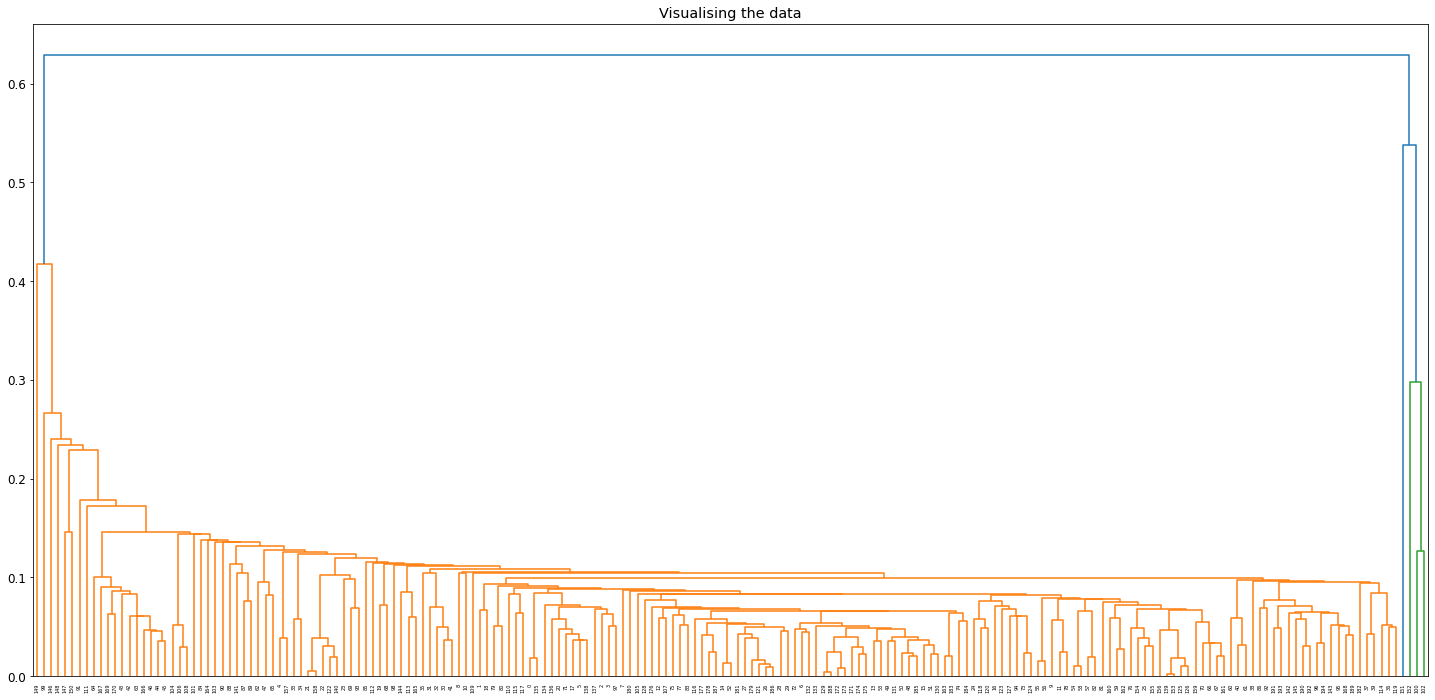

In [184]:
plt.figure(figsize =(25, 12))
plt.title('Visualising the data') 
ward = shc.dendrogram((shc.linkage(X_principal, method ='single')))

<hr>

## Pergunta

### Para um ou mais critérios, o procedimento foi capaz de separar (total ou parcialmente) os pontos em dois grupos, cada um correspondendo a uma das duas classes reais?

### Sim. Três métodos separaram os dados em dois grupos diretamente, correspondendo as classes reais. Somente o agrupamento baseado no método Ward, que apesar de ter criado duas classes no primeiro nível, no segundo criou uma sub-divisão, gerando uma possível terceira classe. Visualmente o agrupamento que parece ser mais coerente com os dados foi gerado pelo método Complete.

<hr>